In [48]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import gc
import sys
import warnings
warnings.filterwarnings("ignore")

In [49]:
import pandas as pd

date = pd.read_csv(r'bosch-production-line-performance/train_date.csv/train_date.csv', nrows=10000)
numeric = pd.read_csv(r'bosch-production-line-performance/train_numeric.csv/train_numeric.csv', nrows=10000)
category = pd.read_csv(r'bosch-production-line-performance/train_categorical.csv/train_categorical.csv', nrows=10000)


In [50]:
date

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,19915,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,19917,640.60,640.60,640.60,640.60,640.60,640.60,640.60,640.60,640.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
numeric

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9996,19915,-0.147,-0.168,-0.033,-0.016,0.074,0.161,0.030,0.128,0.056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9997,19917,-0.095,0.004,0.330,0.312,-0.143,-0.339,0.037,0.128,0.061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [52]:
category

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,19915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,19917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# FEATURE ENGINEERING

In [53]:
# Automatically detect top-n numeric features based on variance
sample_numeric = pd.read_csv(
    r'bosch-production-line-performance/train_numeric.csv/train_numeric.csv',
    nrows=5000
)

# Drop ID and Response
numeric_features = [
    c for c in sample_numeric.columns if c not in ('Id', 'Response')
]

# Choose features with some variance (non-constant)
var_threshold = sample_numeric[numeric_features].var()
selected_numeric = var_threshold[var_threshold > 0.0].sort_values(ascending=False).index[:50].tolist()

num_feats = ['Id'] + selected_numeric + ['Response']


In [54]:
length = date.drop('Id', axis=1).count()
date_cols = length.reset_index().sort_values(by=0, ascending=False)
stations = sorted(date_cols['index'].str.split('_',expand=True)[1].unique().tolist())
date_cols['station'] = date_cols['index'].str.split('_',expand=True)[1]
date_cols = date_cols.drop_duplicates('station', keep='first')['index'].tolist()

In [55]:
data = None
for chunk in pd.read_csv(r'bosch-production-line-performance/train_date.csv/train_date.csv',usecols=['Id'] + date_cols,chunksize=50000,low_memory=False):

    chunk.columns = ['Id'] + stations
    chunk['start_station'] = -1
    chunk['end_station'] = -1
    
    for s in stations:
        chunk[s] = 1 * (chunk[s] >= 0)
        id_not_null = chunk[chunk[s] == 1].Id
        chunk.loc[(chunk['start_station']== -1) & (chunk.Id.isin(id_not_null)),'start_station'] = int(s[1:])
        chunk.loc[chunk.Id.isin(id_not_null),'end_station'] = int(s[1:])   
    data = pd.concat([data, chunk])

In [56]:
for chunk in pd.read_csv(r'bosch-production-line-performance/test_date.csv/test_date.csv',usecols=['Id'] + date_cols,chunksize=50000,low_memory=False):
    
    chunk.columns = ['Id'] + stations
    chunk['start_station'] = -1
    chunk['end_station'] = -1
    for s in stations:
        chunk[s] = 1 * (chunk[s] >= 0)
        id_not_null = chunk[chunk[s] == 1].Id
        chunk.loc[(chunk['start_station']== -1) & (chunk.Id.isin(id_not_null)),'start_station'] = int(s[1:])
        chunk.loc[chunk.Id.isin(id_not_null),'end_station'] = int(s[1:])   
    data = pd.concat([data, chunk])
del chunk
gc.collect()   

5562

In [57]:
data = data[['Id','start_station','end_station']]
usefuldatefeatures = ['Id']+date_cols

In [58]:
minmaxfeatures = None
for chunk in pd.read_csv(r'bosch-production-line-performance/train_date.csv/train_date.csv',usecols=usefuldatefeatures,chunksize=50000,low_memory=False):
    features = chunk.columns.values.tolist()
    features.remove('Id')
    df_mindate_chunk = chunk[['Id']].copy()
    df_mindate_chunk['mindate'] = chunk[features].min(axis=1).values
    df_mindate_chunk['maxdate'] = chunk[features].max(axis=1).values
    df_mindate_chunk['min_time_station'] =  chunk[features].idxmin(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    df_mindate_chunk['max_time_station'] =  chunk[features].idxmax(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    minmaxfeatures = pd.concat([minmaxfeatures, df_mindate_chunk])

del chunk
gc.collect()

0

In [59]:
for chunk in pd.read_csv(r'bosch-production-line-performance/test_date.csv/test_date.csv',usecols=usefuldatefeatures,chunksize=50000,low_memory=False):
    features = chunk.columns.values.tolist()
    features.remove('Id')
    df_mindate_chunk = chunk[['Id']].copy()
    df_mindate_chunk['mindate'] = chunk[features].min(axis=1).values
    df_mindate_chunk['maxdate'] = chunk[features].max(axis=1).values
    df_mindate_chunk['min_time_station'] =  chunk[features].idxmin(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    df_mindate_chunk['max_time_station'] =  chunk[features].idxmax(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    minmaxfeatures = pd.concat([minmaxfeatures, df_mindate_chunk])

del chunk
gc.collect()

0

In [60]:
minmaxfeatures.sort_values(by=['mindate', 'Id'], inplace=True)
minmaxfeatures['min_Id_rev'] = -minmaxfeatures.Id.diff().shift(-1)
minmaxfeatures['min_Id'] = minmaxfeatures.Id.diff()

In [61]:
cols = [['Id']+date_cols,num_feats]

In [62]:
traindata = None
testdata = None

In [63]:
import pandas as pd
import gc

trainfiles = [
    r'bosch-production-line-performance/train_date.csv/train_date.csv',
    r'bosch-production-line-performance/train_numeric.csv/train_numeric.csv'
    
]

testfiles = [
    r'bosch-production-line-performance/test_date.csv/test_date.csv',
    r'bosch-production-line-performance/test_numeric.csv/test_numeric.csv'
]

traindata = None
testdata = None

# === Process Train Files ===
for i, f in enumerate(trainfiles):
    subset = None

    for chunk in pd.read_csv(f, usecols=cols[i], chunksize=100000, low_memory=False):
        subset = pd.concat([subset, chunk]) if subset is not None else chunk

    if traindata is None:
        traindata = subset.copy()
    else:
        traindata = pd.merge(traindata, subset.copy(), on="Id")

    del subset, chunk
    gc.collect()

del cols[1][-1]

# === Process Test Files ===
for i, f in enumerate(testfiles):
    subset = None

    for chunk in pd.read_csv(f, usecols=cols[i], chunksize=100000, low_memory=False):
        subset = pd.concat([subset, chunk]) if subset is not None else chunk

    if testdata is None:
        testdata = subset.copy()
    else:
        testdata = pd.merge(testdata, subset.copy(), on="Id")

    del subset, chunk
    gc.collect()


In [64]:
traindata = traindata.merge(minmaxfeatures, on='Id')
traindata = traindata.merge(data, on='Id')
testdata = testdata.merge(minmaxfeatures, on='Id')
testdata = testdata.merge(data, on='Id')

In [65]:
del minmaxfeatures,data
gc.collect()

0

In [66]:
train = traindata[::2]
valid = traindata[1::2]

In [67]:
del traindata
gc.collect()

0

In [68]:
def mcc(tp, tn, fp, fn):
    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    if den == 0:
        return 0
    else:
        return num / np.sqrt(den)

In [69]:
def eval_mcc(y_true, y_prob):
    idx = np.argsort(y_prob)
    y_true_sort = y_true[idx]
    n = y_true.shape[0]
    nump = 1.0 * np.sum(y_true) 
    numn = n - nump 
    tp,fp = nump,numn
    tn,fn = 0.0,0.0
    best_mcc = 0.0
    best_id = -1
    mccs = np.zeros(n)
    for i in range(n):
        if y_true_sort[i] == 1:
            tp -= 1.0
            fn += 1.0
        else:
            fp -= 1.0
            tn += 1.0
        new_mcc = mcc(tp, tn, fp, fn)
        mccs[i] = new_mcc
        if new_mcc >= best_mcc:
            best_mcc = new_mcc
            best_id = i
    return best_mcc

In [70]:
def mcc_eval(y_prob, dtrain):
    y_true = dtrain.get_label()
    best_mcc = eval_mcc(y_true, y_prob)
    return 'MCC', best_mcc

# MODELLING

In [71]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
import xgboost as xgb
params = {
    'objective': 'binary:logistic',
    'max_depth': 25,
    'base_score': 0.005,
    'eval_metric': 'auc',
    'n_jobs': -1,
   
}


In [73]:
trainm = xgb.DMatrix(train.drop(['Response','Id'],axis=1),train['Response'])
validm = xgb.DMatrix(valid.drop(['Response','Id'],axis=1),valid['Response'])

test = xgb.DMatrix(testdata.drop(['Id'],axis=1))

In [74]:
watchlist = [(trainm, 'train'), (validm, 'val')]

clf = xgb.train(
    params=params,
    dtrain=trainm,
    num_boost_round=100,
    evals=watchlist,
    early_stopping_rounds=20,
    custom_metric=mcc_eval,  
    maximize=True
)


[0]	train-auc:0.94518	train-MCC:0.32029	val-auc:0.87994	val-MCC:0.28038
[1]	train-auc:0.90662	train-MCC:0.34961	val-auc:0.82857	val-MCC:0.28221
[2]	train-auc:0.91385	train-MCC:0.35973	val-auc:0.82682	val-MCC:0.26808
[3]	train-auc:0.96258	train-MCC:0.38413	val-auc:0.86258	val-MCC:0.21969
[4]	train-auc:0.97881	train-MCC:0.46573	val-auc:0.87317	val-MCC:0.26170
[5]	train-auc:0.93211	train-MCC:0.51039	val-auc:0.83020	val-MCC:0.25865
[6]	train-auc:0.93468	train-MCC:0.52692	val-auc:0.82924	val-MCC:0.22173
[7]	train-auc:0.93730	train-MCC:0.59591	val-auc:0.83053	val-MCC:0.26088
[8]	train-auc:0.97188	train-MCC:0.61538	val-auc:0.85659	val-MCC:0.24840
[9]	train-auc:0.97241	train-MCC:0.63655	val-auc:0.85629	val-MCC:0.27098
[10]	train-auc:0.97327	train-MCC:0.66796	val-auc:0.85526	val-MCC:0.27926
[11]	train-auc:0.97495	train-MCC:0.67816	val-auc:0.85698	val-MCC:0.28020
[12]	train-auc:0.97735	train-MCC:0.71190	val-auc:0.85825	val-MCC:0.28452
[13]	train-auc:0.98074	train-MCC:0.72672	val-auc:0.85958	val-

In [75]:
predictions = clf.predict(validm)

np.float64(0.63)

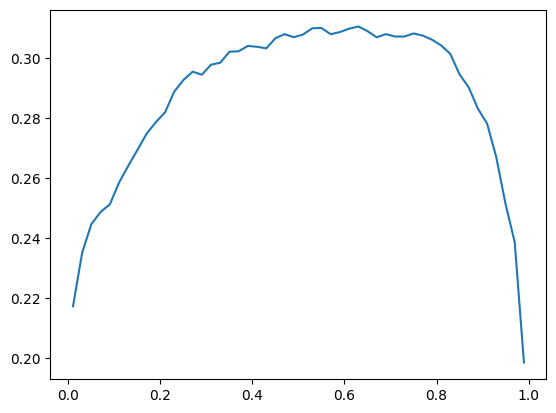

In [76]:
from sklearn.metrics import matthews_corrcoef
thresholds = np.linspace(0.01, 0.99, 50)
mcc = np.array([matthews_corrcoef(valid.Response, predictions>threshold) for threshold in thresholds])

plt.plot(thresholds, mcc)
best_prob = thresholds[mcc.argmax()]
best_prob

In [77]:
test = clf.predict(test)

In [78]:
testdata['Response'] = (test>best_prob).astype(int)
testdata[['Id','Response']].to_csv("submitwoId.csv",index=False)

In [79]:
!gzip submitwoId.csv

'gzip' is not recognized as an internal or external command,
operable program or batch file.


 Starting Random Forest training...
 Random Forest training completed!

 Random Forest Evaluation Results:
Accuracy : 0.9853
Precision: 0.1711
Recall   : 0.3943
F1 Score : 0.2386
MCC      : 0.2533


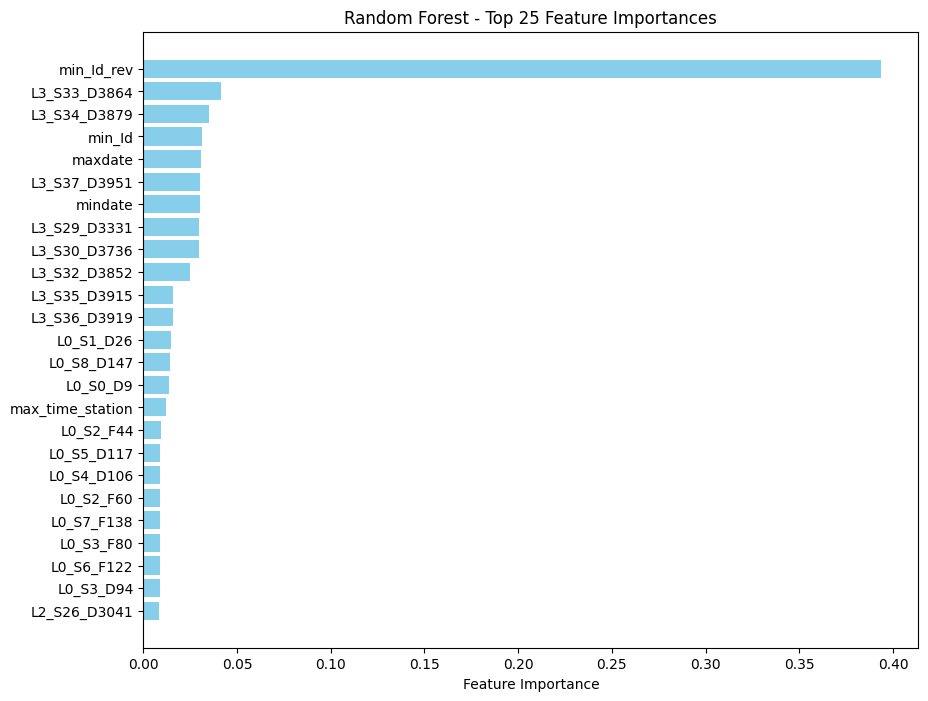

 Model saved as bosch_random_forest.pkl


0

In [80]:

import gc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
)
import joblib

print(" Starting Random Forest training...")

# --- Prepare train and validation sets ---
X_train = train.drop(['Response', 'Id'], axis=1)
y_train = train['Response']
X_valid = valid.drop(['Response', 'Id'], axis=1)
y_valid = valid['Response']

# --- Handle missing values ---
X_train = X_train.fillna(-999)
X_valid = X_valid.fillna(-999)

# --- Initialize Random Forest model ---
rf_model = RandomForestClassifier(
    n_estimators=300,          # number of trees
    max_depth=25,              # limit tree depth (same as XGBoost)
    n_jobs=-1,                 # use all CPU cores
    class_weight='balanced_subsample',
    random_state=42
)

# --- Train the model ---
rf_model.fit(X_train, y_train)
print(" Random Forest training completed!")

# --- Evaluate on validation set ---
y_pred = rf_model.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
prec = precision_score(y_valid, y_pred, zero_division=0)
rec = recall_score(y_valid, y_pred, zero_division=0)
f1 = f1_score(y_valid, y_pred, zero_division=0)
mcc = matthews_corrcoef(y_valid, y_pred)

print("\n Random Forest Evaluation Results:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"MCC      : {mcc:.4f}")

# --- Feature importance plot ---
import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[-25:]  # top 25
plt.figure(figsize=(10, 8))
plt.title("Random Forest - Top 25 Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.xlabel("Feature Importance")
plt.show()

# --- Save model for reuse ---
joblib.dump(rf_model, "bosch_random_forest.pkl")
print(" Model saved as bosch_random_forest.pkl")

gc.collect()


In [81]:
%pip install optuna
import optuna
from sklearn.metrics import matthews_corrcoef
import xgboost as xgb
import numpy as np


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
def objective(trial):
    # Define parameter search space
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',  # we use AUC for internal guidance, MCC externally
        'max_depth': trial.suggest_int('max_depth', 25, 35),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
       
        
    }

    # Build matrices
    trainm = xgb.DMatrix(train.drop(['Response','Id'],axis=1), train['Response'])
    validm = xgb.DMatrix(valid.drop(['Response','Id'],axis=1), valid['Response'])

    # Train model with early stopping
    model = xgb.train(
        params=params,
        dtrain=trainm,
        evals=[(validm, "val")],
        num_boost_round=500,
        early_stopping_rounds=30,
        verbose_eval=False
    )

    # Predict probabilities
    preds = model.predict(validm)
    # Evaluate MCC
    mcc = matthews_corrcoef(valid['Response'], (preds > 0.5).astype(int))
    return mcc


In [90]:
study = optuna.create_study(direction='maximize', study_name='xgb_mcc_tune')
study.optimize(objective, n_trials=10, show_progress_bar=True)

print(" Best MCC:", study.best_value)
print(" Best Params:", study.best_params)


[I 2025-10-31 01:11:21,080] A new study created in memory with name: xgb_mcc_tune


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-10-31 01:11:58,309] Trial 0 finished with value: 0.2023959618771297 and parameters: {'max_depth': 35, 'learning_rate': 0.012340047135353279, 'subsample': 0.788054522495482, 'colsample_bytree': 0.6812791430608228}. Best is trial 0 with value: 0.2023959618771297.
[I 2025-10-31 01:12:28,416] Trial 1 finished with value: 0.32855219041021655 and parameters: {'max_depth': 27, 'learning_rate': 0.056225774357851935, 'subsample': 0.7330123356728238, 'colsample_bytree': 0.9736215955805356}. Best is trial 1 with value: 0.32855219041021655.
[I 2025-10-31 01:12:49,171] Trial 2 finished with value: 0.31217452524554834 and parameters: {'max_depth': 26, 'learning_rate': 0.09572094781480393, 'subsample': 0.6310635615852987, 'colsample_bytree': 0.6435979566715656}. Best is trial 1 with value: 0.32855219041021655.
[I 2025-10-31 01:13:33,421] Trial 3 finished with value: 0.32803093745088047 and parameters: {'max_depth': 25, 'learning_rate': 0.030873450586451353, 'subsample': 0.6219869322944334, 'c

[0]	train-auc:0.93165	val-auc:0.87591
[50]	train-auc:0.99090	val-auc:0.89276
[89]	train-auc:0.99699	val-auc:0.89147
Best MCC: 0.3331 at threshold 0.470


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

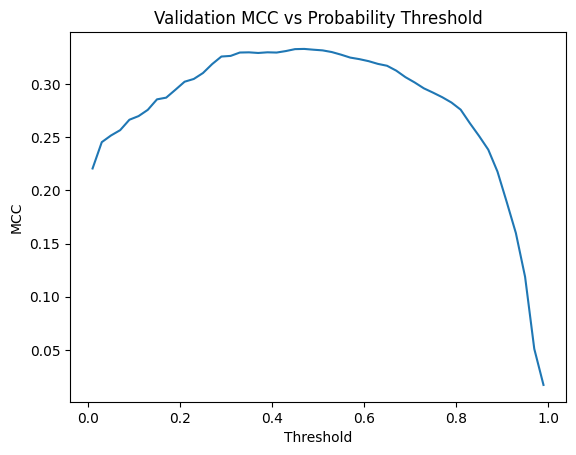

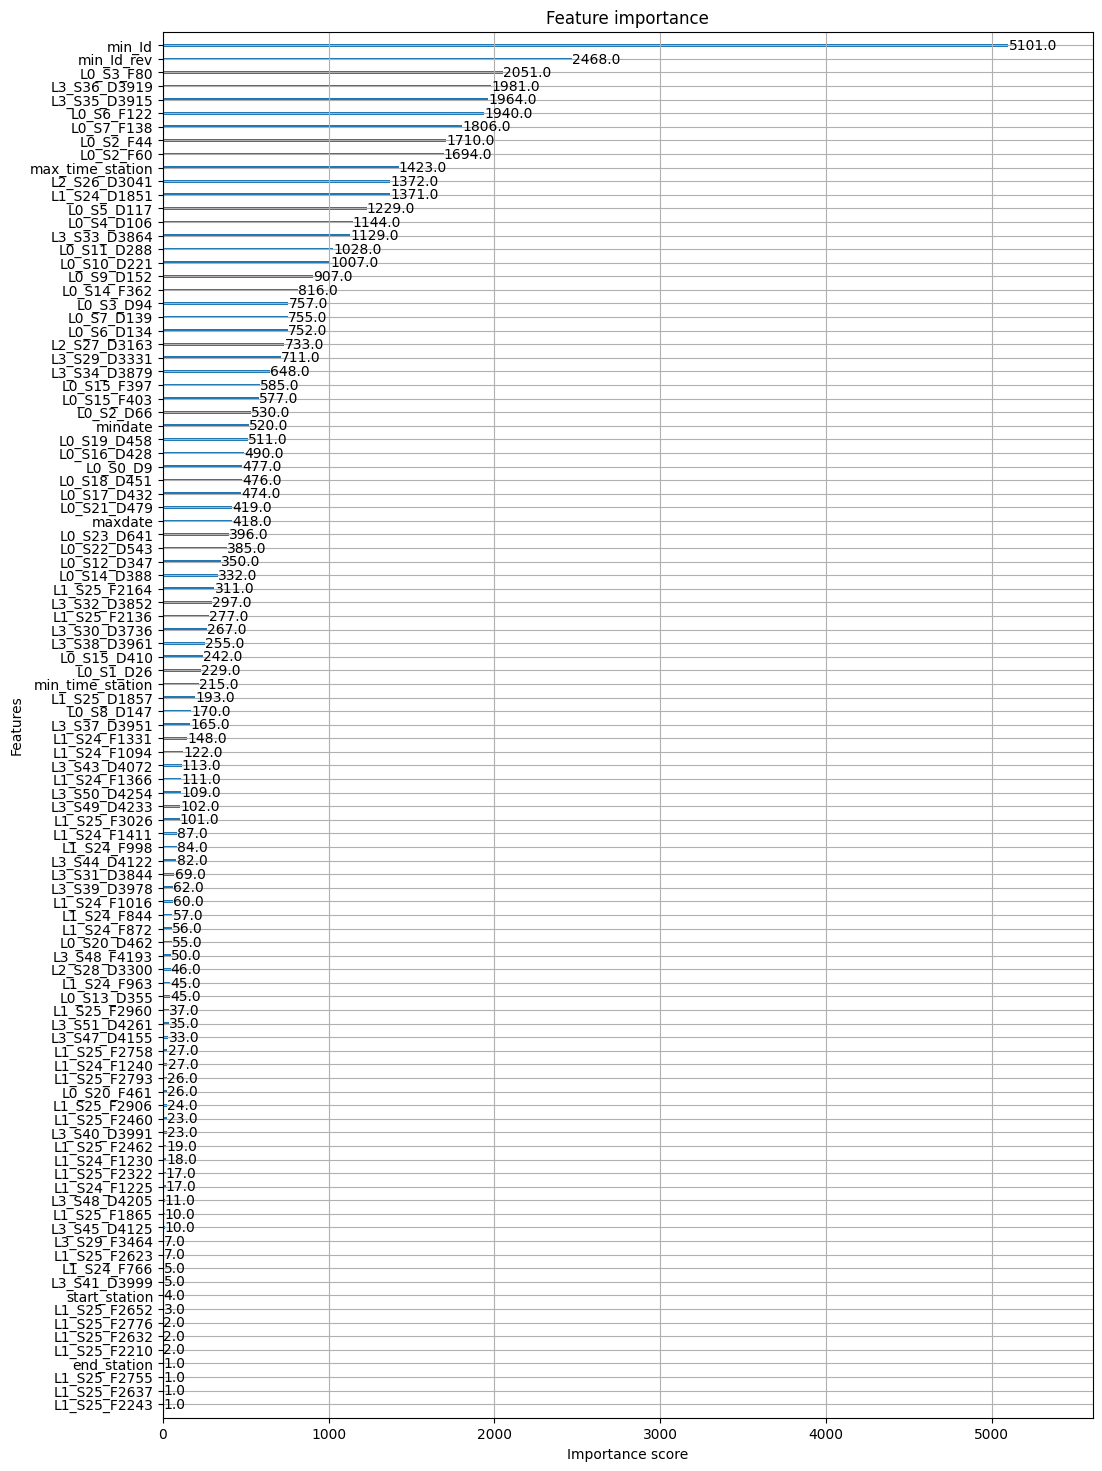

In [99]:
best_params = study.best_params
best_params.update({
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'n_jobs': -1
})

trainm = xgb.DMatrix(train.drop(['Response','Id'],axis=1), train['Response'])
validm = xgb.DMatrix(valid.drop(['Response','Id'],axis=1), valid['Response'])
testm = xgb.DMatrix(testdata.drop(['Id'],axis=1))

watchlist = [(trainm, 'train'), (validm, 'val')]

clf = xgb.train(
    params=best_params,
    dtrain=trainm,
    num_boost_round=1000,
    evals=watchlist,
    early_stopping_rounds=50,
    verbose_eval=50
)

predictions = clf.predict(validm)

thresholds = np.linspace(0.01, 0.99, 50)
mcc = np.array([matthews_corrcoef(valid['Response'], predictions>threshold) for threshold in thresholds])

best_prob = thresholds[mcc.argmax()]
print(f"Best MCC: {mcc.max():.4f} at threshold {best_prob:.3f}")

plt.plot(thresholds, mcc)
plt.title("Validation MCC vs Probability Threshold")
plt.xlabel("Threshold")
plt.ylabel("MCC")




fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf,ax=ax)



In [ ]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf,ax=ax)

In [ ]:
!gzip submit_tuned.csv